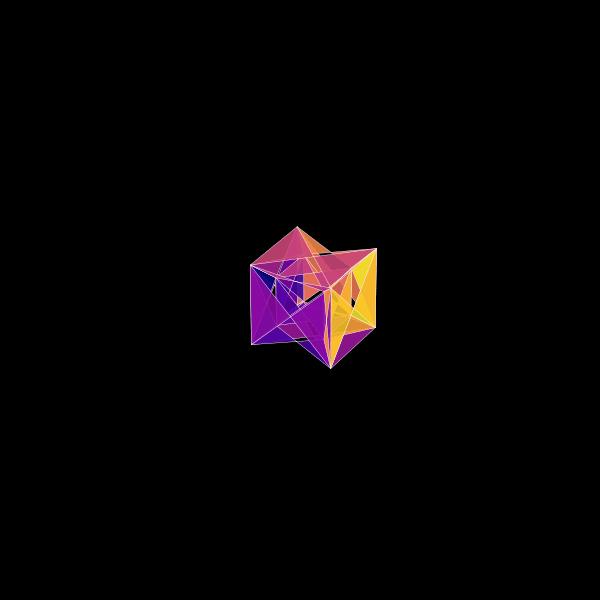

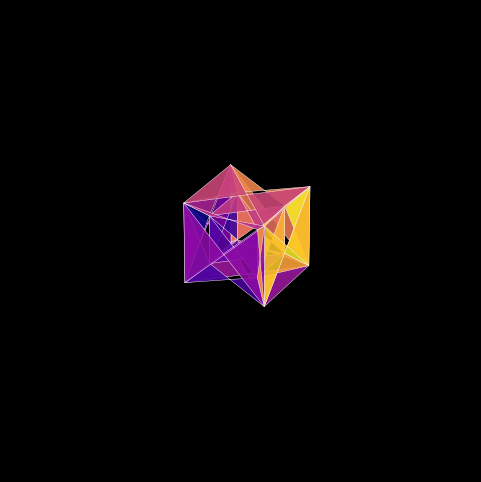

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.cm import plasma
from itertools import product
from IPython.display import Image

# 1. 4D Tesseract vertices and face logic
vertices = np.array(list(product([-1, 1], repeat=4)))

def get_square_faces(vertices):
    faces = set()
    face_list = []
    for i in range(len(vertices)):
        for j in range(i + 1, len(vertices)):
            diff = vertices[i] != vertices[j]
            if np.sum(diff) == 2:
                shared = vertices[i][~diff]
                candidates = [v for v in vertices if np.all(v[~diff] == shared)]
                if len(candidates) == 4:
                    quad = tuple(sorted([tuple(v) for v in candidates]))
                    if quad not in faces:
                        faces.add(quad)
                        face_list.append(candidates)
    return np.array(face_list)


face_indices = get_square_faces(vertices)

# 2. Rotation and projection
def rotate_4d(points, axw, ayz):
    cx, sx = np.cos(axw), np.sin(axw)
    cy, sy = np.cos(ayz), np.sin(ayz)
    rot_xw = np.array([[cx, 0, 0, -sx], [0, 1, 0, 0], [0, 0, 1, 0], [sx, 0, 0, cx]])
    rot_yz = np.array([[1, 0, 0, 0], [0, cy, -sy, 0], [0, sy, cy, 0], [0, 0, 0, 1]])
    return points @ rot_xw @ rot_yz

def project_to_3d(points, w_distance=4.0):
    w = points[:, 3]
    factor = w_distance / (w_distance - w)
    return points[:, :3] * factor[:, np.newaxis]

# 3. Plot setup
fig = plt.figure(figsize=(6, 6), facecolor='black')
ax = fig.add_subplot(111, projection='3d', facecolor='black')
ax.set_axis_off()
ax.set_box_aspect([1, 1, 1])

# 4. Frame update
def update(frame):
    ax.cla()
    ax.set_axis_off()
    angle1 = frame * 0.03
    angle2 = frame * 0.02
    rotated = rotate_4d(vertices, angle1, angle2)
    projected = project_to_3d(rotated)
    polys, colors = [], []

    for idx, face in enumerate(face_indices):
        quad = [projected[np.where((vertices == v).all(axis=1))[0][0]] for v in face]
        polys.append(quad)
        colors.append(plasma((idx / len(face_indices)) % 1.0))

    collection = Poly3DCollection(polys, facecolors=colors, edgecolors='white', linewidths=0.3, alpha=0.88)
    ax.add_collection3d(collection)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-4, 4)

# 5. Animate and save
ani = FuncAnimation(fig, update, frames=100, interval=50)
ani.save("tesseract_plasma_skin.gif", writer=PillowWriter(fps=25))

# 6. Display
Image("tesseract_plasma_skin.gif")


In [24]:
!git clone https://github.com/konradkriehmig/product-development.git
%cd product-development

Cloning into 'product-development'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/product-development/product-development


In [23]:
!cp /content/tesseract.ipynb .

cp: cannot stat '/content/tesseract.ipynb': No such file or directory
